#Importing Packages


In [ ]:
# basic packages for data and plotting
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
import io

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

# for predictive analysis
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric
from sklearn.metrics import r2_score # R^2 calculator
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression # model 1
from sklearn.linear_model import Lasso # model 2
from sklearn.linear_model import Ridge # model 3
from xgboost import XGBRegressor # model 4
from sklearn.ensemble import GradientBoostingRegressor # model 5

#Importing and Reading Dataset
Please upload the file 'Energy.csv' in Google Colab

In [ ]:
# read data into a DataFrame
data = pd.read_csv('Energy.csv')

In [ ]:
data.head()

,Compactness,Surface Area,Wall Area,Roof Area,Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
data.tail()

,Compactness,Surface Area,Wall Area,Roof Area,Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(768, 10)

In [ ]:
data.describe()

,Compactness,Surface Area,Wall Area,Roof Area,Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


#Correlation and Data Plotting of Dataset


In [ ]:
correlation_coefficients = data.corr()
correlation_coefficients

,Compactness,Surface Area,Wall Area,Roof Area,Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889431,0.895785
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
Glazing Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing Area Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-0.002587,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


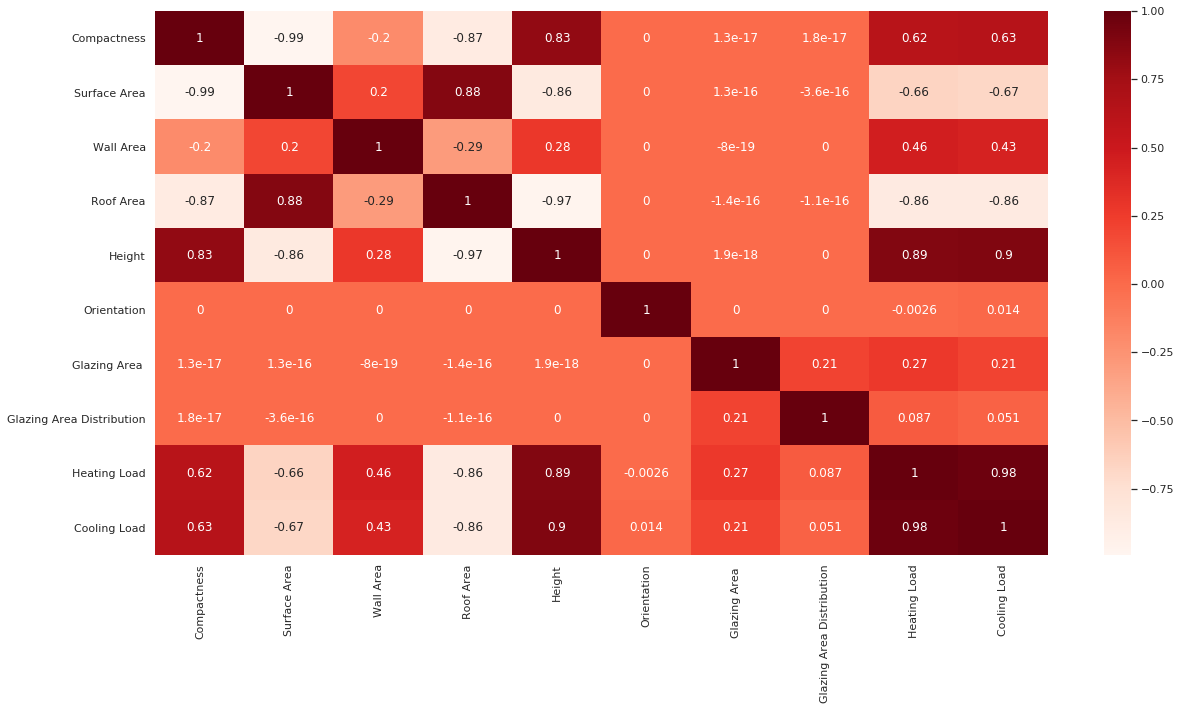

In [ ]:
sns.heatmap(correlation_coefficients, annot=True, cmap='Reds')

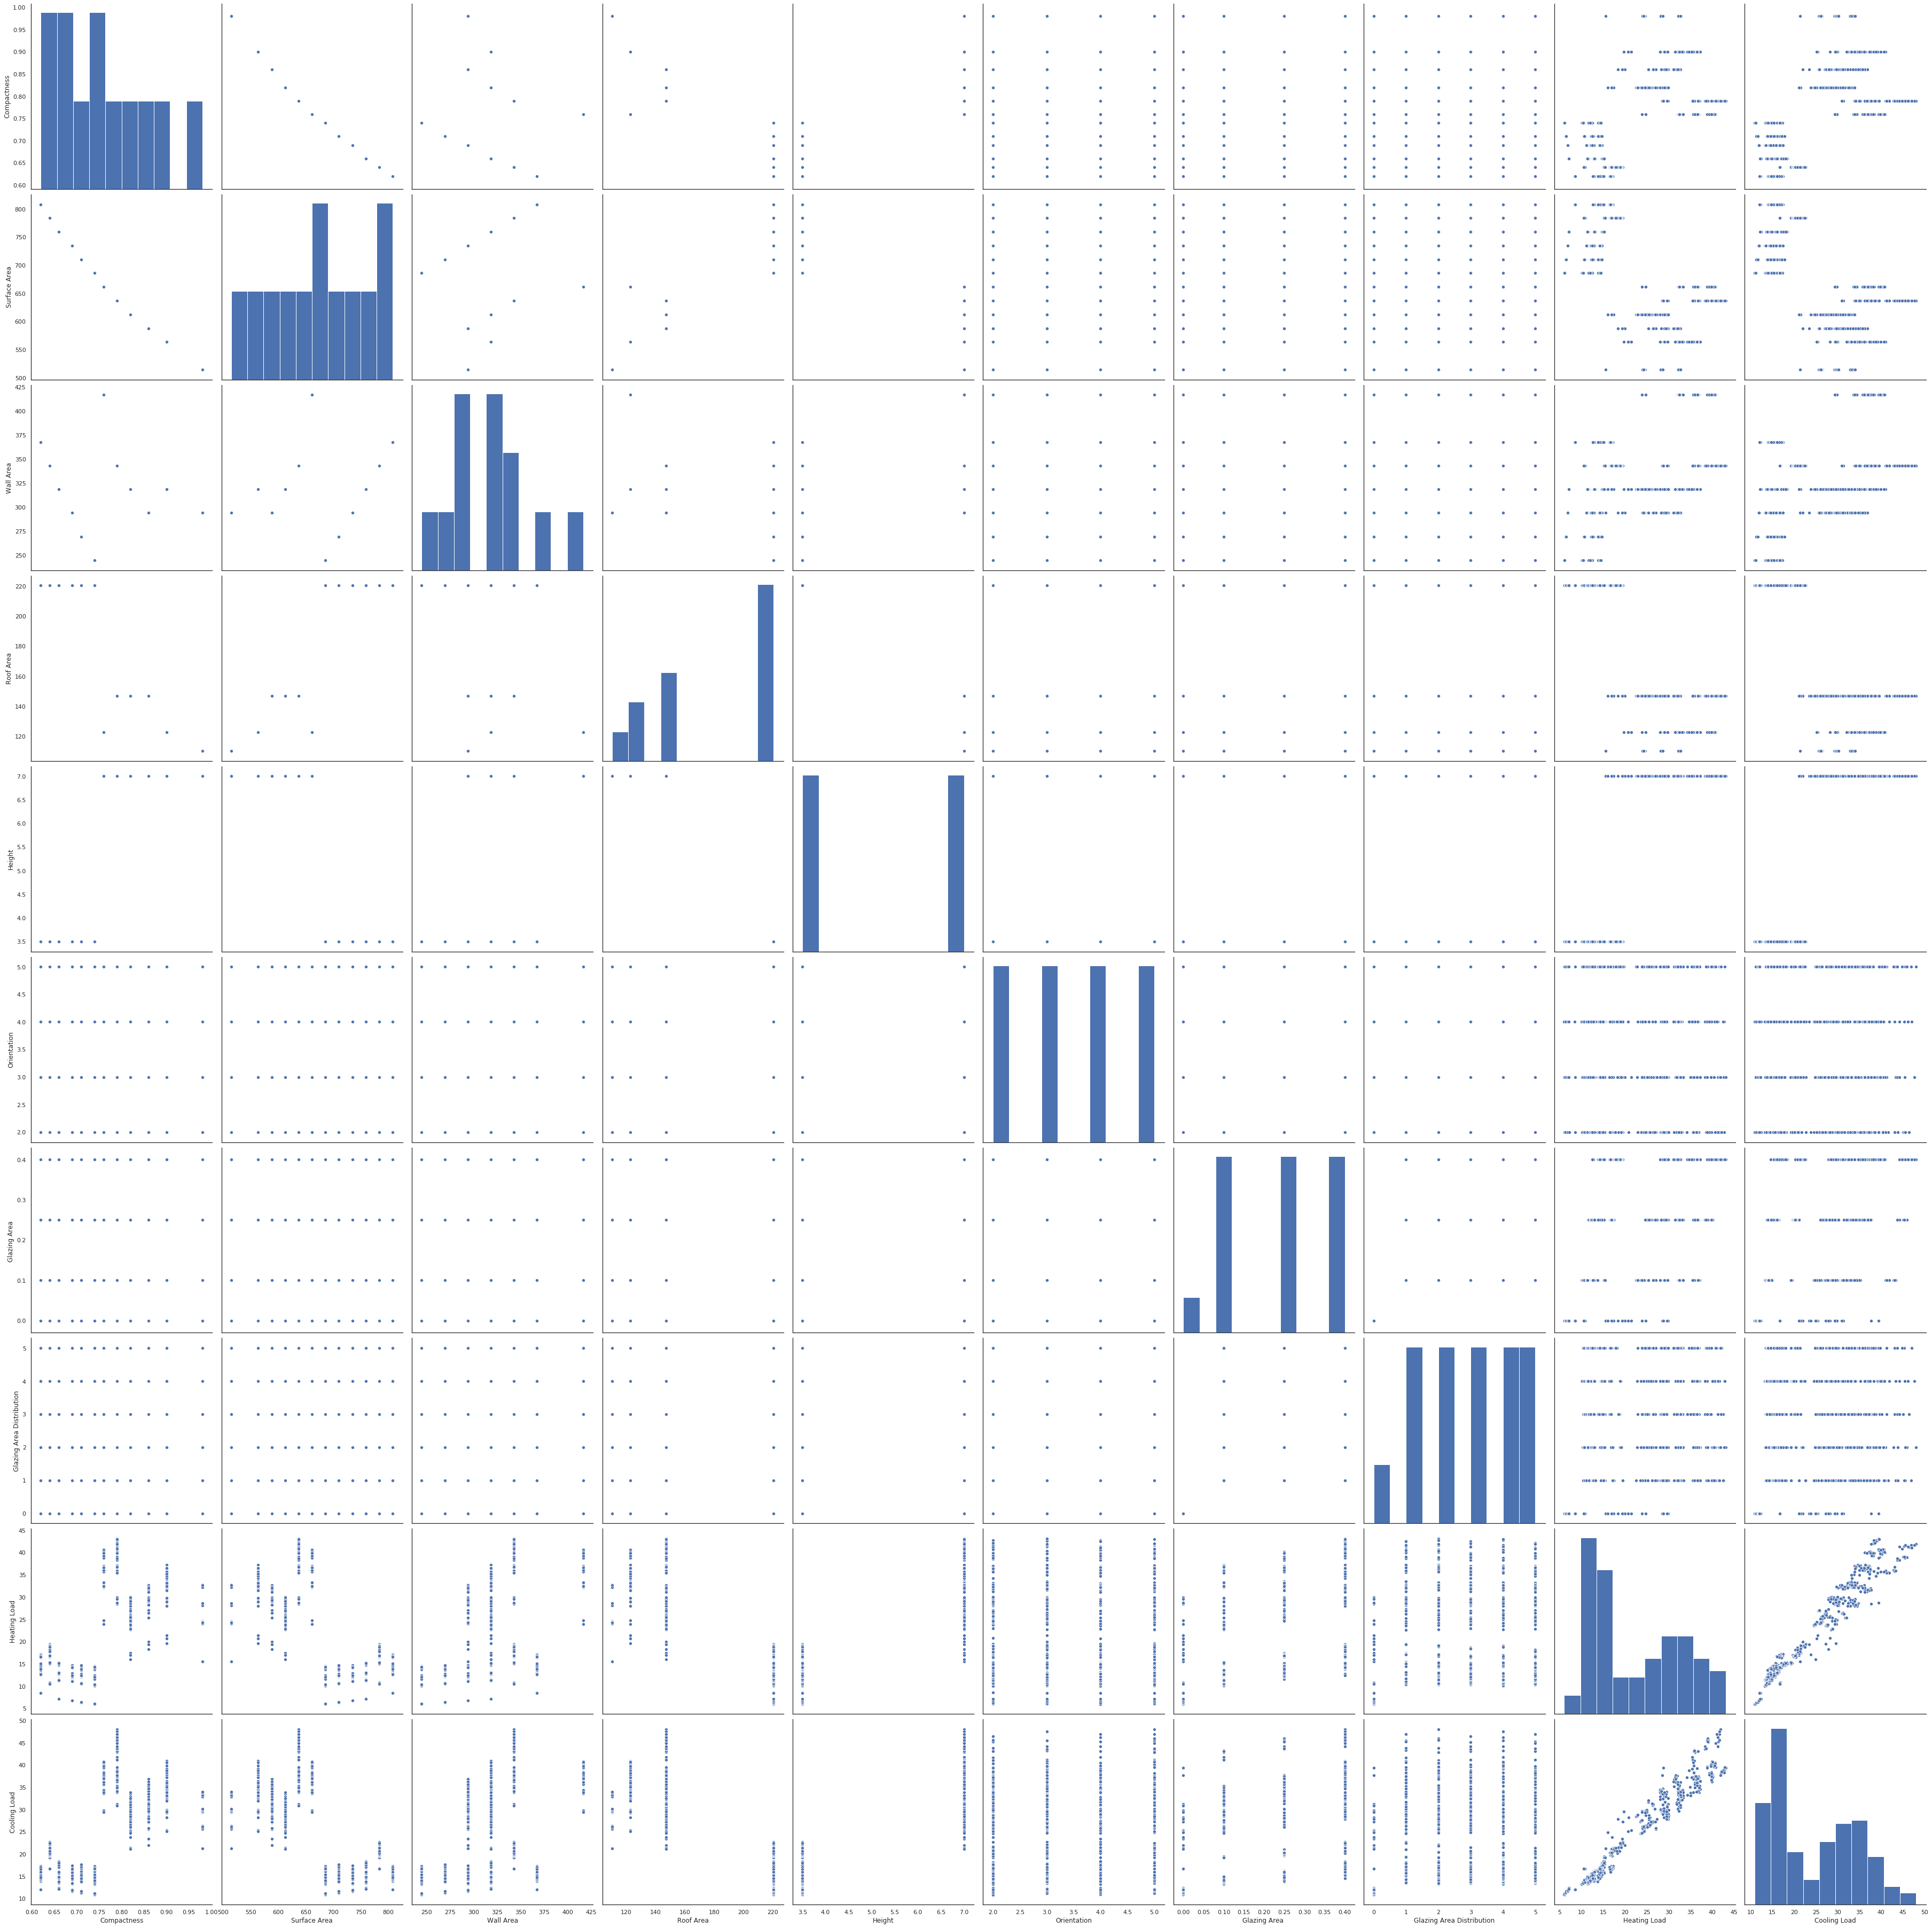

In [ ]:
sns.pairplot(data, height=5)

#Model Training


In [ ]:
# Define Features
features = ['Compactness','Surface Area', 'Wall Area',  'Height', 'Roof Area',
       'Glazing Area ']

# Set X
X = data[features]

#Setting Outcome

In [ ]:
# Set y
y = data['Heating Load']
#y = data['Cooling Load']

# Remove # in cooling load if you want to predict Cooling Load and and # to the heating load

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
model1 = LinearRegression()
model2 = Lasso()
model3 = Ridge()
model4 = XGBRegressor()
model5 = GradientBoostingRegressor()

In [ ]:
# Fit Model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)

[02:37:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Linear Regression

In [ ]:
# get coefficients
coefficient1 = model1.coef_

# get intercept
intercept1 = model1.intercept_

In [ ]:
coefficient1

array([-7.35951671e+01,  9.85225216e+11, -9.85225216e+11,  4.09403610e+00,
       -1.97045043e+12,  1.45344490e+01])

In [ ]:
intercept1

104.35824080722753

In [ ]:
# calculate the R-squared
model1.score(X_test, y_test)

0.8851039183329145

In [ ]:
model1.score(X_train, y_train)

0.8865369812813724

In [ ]:
y_predicted1 = model1.predict(X_test)
y_predicted1a = model1.predict(X_train)

In [ ]:
np.sqrt(mse(y_predicted1, y_test)) # Root mean squared error

3.218161634896419

In [ ]:
np.sqrt(mse(y_predicted1a, y_train)) # Root mean squared error

3.198968407405457

Lasso

In [ ]:
# get coefficients
coefficient2 = model2.coef_

# get intercept
intercept2 = model2.intercept_

In [ ]:
coefficient2

array([-0.        , -0.07501543,  0.11431633,  0.        , -0.02220183,
        0.        ])

In [ ]:
intercept2

42.44209580926531

In [ ]:
# calculate the R-squared
model2.score(X_test, y_test)

0.7662108722477315

In [ ]:
model2.score(X_train, y_train)

0.7812822963525122

In [ ]:
y_predicted2 = model2.predict(X_test)
y_predicted2a = model2.predict(X_train)

In [ ]:
np.sqrt(mse(y_predicted2, y_test)) # Root mean squared error

4.590578299931856

In [ ]:
np.sqrt(mse(y_predicted2a, y_train)) # Root mean squared error

4.441449749478092

Ridge

In [ ]:
# get coefficients
coefficient3 = model3.coef_

# get intercept
intercept3 = model3.intercept_

In [ ]:
coefficient3

array([-4.13417780e+00,  1.47508103e-02,  2.20979235e-02,  5.45504439e+00,
       -3.67355702e-03,  1.34475099e+01])

In [ ]:
intercept3

-20.455936933913367

In [ ]:
# calculate the R-squared
model3.score(X_test, y_test)

0.8809629332518043

In [ ]:
model3.score(X_train, y_train)

0.8816727557603211

In [ ]:
y_predicted3 = model3.predict(X_test)
y_predicted3a = model3.predict(X_train)

In [ ]:
np.sqrt(mse(y_predicted3, y_test)) # Root mean squared error

3.2756414075484805

In [ ]:
np.sqrt(mse(y_predicted3a, y_train)) # Root mean squared error

3.2668196499954223

XGBRegressor

In [ ]:
pred_test4 = model4.predict(X_test)
pred_train4 = model4.predict(X_train)
print('Train: ', r2_score(y_train, pred_train4))
print('Test: ', r2_score(y_test, pred_test4))

Train:  0.9729617421167377
Test:  0.9688423598766142


In [ ]:
# Root mean squared error
np.sqrt(mse(pred_test4, y_test))

1.6758591792188464

In [ ]:
np.sqrt(mse(pred_train4, y_train))

1.5616084022770216

Gradient Boosting Regressor

In [ ]:
pred_test5 = model5.predict(X_test)
pred_train5 = model5.predict(X_train)
print('Train: ', r2_score(y_train, pred_train5))
print('Test: ', r2_score(y_test, pred_test5))

Train:  0.9979696330795305
Test:  0.9974809544793091


In [ ]:
# Root mean squared error
np.sqrt(mse(pred_test5, y_test))

0.5053941120075716

In [ ]:
np.sqrt(mse(pred_train5, y_train))

0.45414615417858

#Predicting Output
(Change cooling load or cooling load in the Setting Outcome)

In [ ]:
# new input
# add input with the order [['Compactness','Surface Area', 'Wall Area',  'Height', 'Roof Area', 'Glazing Area ']]

new_input = [[0.90,	563.5,	318.5,	122.50,	7.0,	0.0]]
model5.predict(new_input)

array([19.80353545])